In [ ]:
import warnings
warnings.filterwarnings('ignore')

**If using Jupyter notebook, run this to enable ipywidgets to show in the notebook:**

In [ ]:
# !jupyter nbextension enable --py widgetsnbextension

**If using Jupyter lab:**

In [ ]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [ ]:
%matplotlib inline

# PyData Munich Talk: "Error Bars are Your Experiment: the Statistics Behind the Most Important Feature of Data Visualizations" 
### Given March 6th, 2019, by Nick Del Grosso

## Packages Used for this Talk

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, interactive, FloatSlider, Dropdown, IntSlider, FloatLogSlider, Checkbox, VBox, HBox

## Exercise: Comparing Two Studies on Insomnia Treatment: (from Cumming, 2012, pp.1-3)
  

> "Lucky (2008) found that the new treatment showed a **statistically significant advantage** over the current treatment: **M(difference) = 3.6, SD(difference) = 7, N = 22, t(42) = 2.4, p = .02**."

> "Noluck (2008) found **no statistically significant difference** between the two treatment means: **M(difference) = 2.2, SD(difference) = 7.6, N = 18, t(34) = 1.2, p = .22**."

### Do These 2 Studies Produce *Consistent* Conclusions,  *Inconsistent* Conclusions, or *No* Conclusions?

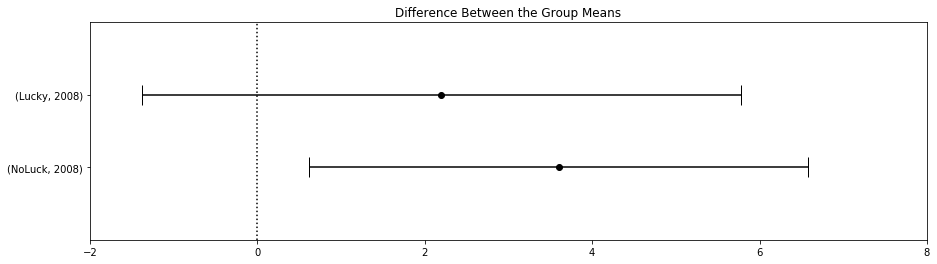

In [26]:
l_mean, l_ci = 3.6,  7 / np.sqrt(22) * 2
n_mean, n_ci = 2.2,  7.6 / np.sqrt(18) * 2

fig2, ax = plt.subplots(figsize=[15, 4])
ax.errorbar(x=[l_mean, n_mean], y=[0, 1], xerr=[l_ci, n_ci], capsize=10, fmt='ko');
ax.set(xlim=[-2, 8], ylim=[-1, 2], yticks=[0, 1], yticklabels=['(NoLuck, 2008)', '(Lucky, 2008)'], title='Difference Between the Group Means');
plt.vlines(0, *ax.get_ylim(), linestyle='dotted');

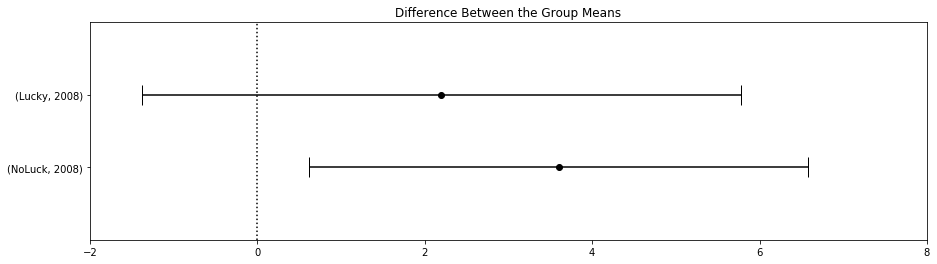

In [27]:
fig2

### Do These 2 Studies Produce *Consistent* Conclusions,  *Inconsistent* Conclusions, or *No* Conclusions?

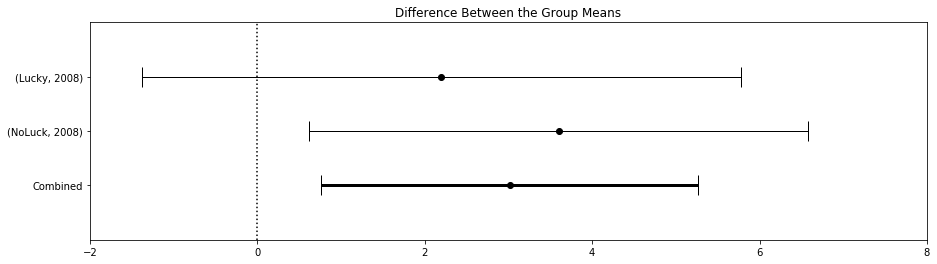

In [28]:
x = np.linspace(-5, 20, 500)
b_pdf = stats.norm(l_mean, l_ci/2).pdf(x) * stats.norm(n_mean, n_ci/2).pdf(x)
b_pdf /= b_pdf.sum()

b_mean = x[np.where(np.cumsum(b_pdf) > .5)[0][0]]
b_ci = b_mean - x[np.where(np.cumsum(b_pdf) > .025)[0][0]]


fig3, ax = plt.subplots(figsize=[15, 4])
ax.errorbar(x=[l_mean, n_mean], y=[0, 1], xerr=[l_ci, n_ci], capsize=10, fmt='ko', linewidth=1);
ax.errorbar(x=[b_mean], y=[-1], xerr=[b_ci], capsize=10, fmt='ko', linewidth=3);
ax.set(xlim=[-2, 8], ylim=[-2, 2], yticks=[-1, 0, 1], yticklabels=['Combined', '(NoLuck, 2008)', '(Lucky, 2008)'], title='Difference Between the Group Means');
plt.vlines(0, *ax.get_ylim(), linestyle='dotted');

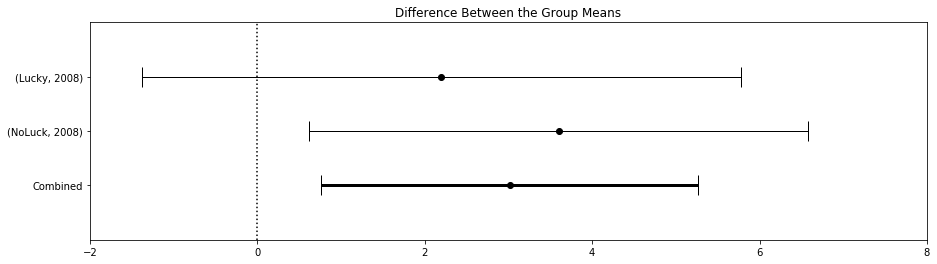

In [29]:
fig3

### Do These 2 Studies Produce *Consistent* Conclusions,  *Inconsistent* Conclusions, or *No* Conclusions?

## Demo: What Do Error Bars Represent?

In [14]:
def error_bars_demo(mean=0., std=1., n=100., errorbar='std', distribution='norm', from_data=False, show_dist=False, show_hist=False, seaborn_plot=None, ):
    n = int(n)
    x = np.linspace(-20, 20, 1000)
    if distribution == 'norm':
        dist = stats.norm(mean, std)
    else:
        dist = stats.gamma(3, mean, std)
    data = dist.rvs(n)
    mean = dist.mean() if not from_data else np.mean(data)
    std = dist.std()   if not from_data else np.std(data)
    pdf = dist.pdf(x) #if source=='dist' else 
    sem = np.std(data) / np.sqrt(n - 1)
    
    
    
    if not errorbar or errorbar == 'std':
        error_range = np.linspace(mean - std, mean + std, 200)
    elif errorbar == '2std':
        error_range = np.linspace(mean - 2 * std, mean + 2 * std, 200)
    elif errorbar == '95% IQI':
        if not from_data:
            error_range = np.linspace(*dist.interval(.95), num=600) 
        else:
            error_range = np.linspace(*np.percentile(data, [2.5, 97.5]), num=600)
    elif errorbar == 'sem':
        error_range = np.linspace(mean - sem, mean + sem, 600)
    elif errorbar == '2sem':
        error_range = np.linspace(mean - 2 * sem, mean + 2 * sem, 600)
    elif errorbar == '95% CI':
        boot_ci = 500
        bootstrapped_data = np.random.choice(data, size=(len(data), boot_ci))
        bootstrapped_means = np.mean(bootstrapped_data, axis=0)
        assert len(bootstrapped_means) == boot_ci
        error_range = np.linspace(*np.percentile(bootstrapped_means, [2.5, 97.5]), num=600)
        
        
    error_pdf = dist.pdf(error_range)
    
    
    # Plots
    fig = plt.figure(figsize=(15, 9))
    ax1 = plt.subplot2grid((3, 4), (0, 0), rowspan=3, fig=fig);
    ax2 = plt.subplot2grid((3, 4), (0, 1), rowspan=1, colspan=2, fig=fig)
    ax3 = plt.subplot2grid((3, 4), (0, 3), rowspan=3, fig=fig)
    ax4 = plt.subplot2grid((3, 4), (1, 1), rowspan=1, colspan=2, fig=fig)
    ax5 = plt.subplot2grid((3, 4), (2, 1), rowspan=1, colspan=2, fig=fig)
    ax_lims = [-3, 7]
    
    ## Bar Chart, with Error Bars
#     ax1.bar(['Control'], mean, alpha=0.3, width=0.2)
#     ax1.errorbar(x=0, y=mean, yerr=error_range.max() - mean, fmt='ko', capsize=10)
    ax1.errorbar(x=0, y=mean, yerr=[[mean - error_range.min()], [error_range.max() - mean]], fmt='ko', capsize=10)
    ax1.set(xlim=[-1, 1], ylim=ax_lims, xticks=[])
    ax1.hlines(0, *ax_lims, linestyle='dotted', color='black')
    
    
    ## Distribution, with Error Bar Coverage Highlighted 
    if show_dist:
        ax2.plot(x, pdf, label='PDF of Normal Distribution', linewidth=3);
        ax2.errorbar(x=mean, y=0.1 * np.max(pdf), xerr=[[mean - error_range.min()], [error_range.max() - mean]], fmt='ko', capsize=10)
        ax2.fill_between(error_range, error_pdf, color='red', alpha=0.3, label='1 Standard Deviation')
        ax2.text(mean, 0.5 * np.max(pdf), f"{(np.diff(error_range) * error_pdf[:-1]).sum() / (np.diff(x) * pdf[:-1]).sum():.1%}", horizontalalignment='center')
        ax2.vlines(dist.mean(), *ax2.get_ylim(), linestyle='dotted')
    ax2.set(yticklabels=[], xlim=ax_lims, yticks=[])
    
    ## Seaborn's Representation
    if seaborn_plot:
        # Instead of the figure-level sns.catplot(kind='strip'), use the equivelent, axis-level sns.stripplot() to put it inside the existing figure.
        distribution_plots = {'strip': sns.stripplot, 'swarm': sns.swarmplot, 'box': sns.boxplot, 'violin': sns.violinplot, 'boxen': sns.boxenplot, 'point': sns.pointplot, 'bar': sns.barplot}
        if seaborn_plot in ['boxen', 'violin']:
            distribution_plots[seaborn_plot](y=data, ax=ax3, width=2.5, color=sns.color_palette()[0]);
        else:
            distribution_plots[seaborn_plot](y=data, ax=ax3, color=sns.color_palette()[0]);
    ax3.hlines(0, *ax_lims, linestyle='dotted', color='black')
    ax3.set(ylim=ax_lims, xticks=[])
    
    ## Show Data Distribution
    if show_hist:
        if errorbar == '95% CI':
            for boot in bootstrapped_data.T[::20]:  #No need to show them all...
                sns.kdeplot(boot, alpha=0.2, color=sns.color_palette()[0], ax=ax4)
            ax4.vlines(bootstrapped_means, *ax4.get_ylim(), alpha=0.02, color='black')
        else:
            sns.distplot(data, ax=ax4)
            ax4.vlines(np.mean(data), *ax4.get_ylim(), linestyle='dotted')
        
        ## 
        if errorbar == 'sem' or errorbar == '2sem':
            dist_derived = stats.norm(np.mean(data), sem)
            pdf_derived = dist_derived.pdf(x)
            ax5.plot(x, pdf_derived)
            ax5.fill_between(error_range, dist_derived.pdf(error_range), color='red', alpha=0.3)
        elif errorbar == '95% CI':
            dist_bootstrapped = stats.norm(np.mean(bootstrapped_means), np.std(bootstrapped_means))
            ax5.plot(x, dist_bootstrapped.pdf(x))
            err_range = np.linspace(*dist_bootstrapped.interval(.95), num=200)
            ax5.fill_between(err_range, dist_bootstrapped.pdf(err_range), color='red', alpha=0.3)
        
#         ax5.vlines(bootstrapped_means, *ax4.get_ylim(), alpha=0.02, color=sns.color_palette()[3])
    ax4.set(xlim=ax_lims, yticks=[])
    ax5.set(xlim=ax_lims, yticks=[])
    

h1 = interactive(error_bars_demo,
    mean = FloatSlider(0.5, min=-3, max=3),
    std = FloatSlider(1, min=0.01, max=4),
    n = IntSlider(40, min=6, max=400),
    errorbar = Dropdown(options=['', 'std', '2std', '95% IQI', 'sem', '2sem', '95% CI']),
    from_data = Checkbox(False),
    show_dist = Checkbox(False),
    distribution = Dropdown(options=['norm', 'gamma']),
    show_hist = Checkbox(False),
    seaborn_plot = Dropdown(options=[None, 'strip', 'swarm', 'box', 'violin', 'boxen', 'point', 'bar']),
)

stats_widget = VBox([HBox([VBox(h1.children[:3]), VBox(h1.children[3:6]), VBox(h1.children[6:9])]), h1.children[-1]])

In [30]:
stats_widget

## A Final Visualization Suggestion: The "Cat's Eye Plot"


**Credit**: Geoff Cumming
<img src="img/catseye.png" alt="Drawing" style="width: 400px;"/>

### And now: The Cat's eyes in Python!

In [16]:
def plot_catseye(x, data, show_bars=True, boot_ci=6000, estimator=np.mean, scale=1., color=sns.color_palette()[0], ax=None):
    """Makes a cat's eye-like plot, as described in Cumming's book, "Understanding the New Statistics". """
    if ax is None:
        ax = plt.gca()
        
    boots = np.apply_along_axis(estimator, axis=0, arr=np.random.choice(data, size=(len(data), boot_ci)))
    kde = stats.gaussian_kde(boots, bw_method=0.35)
    for ci in [68.27, 95.45]:
        ci_x = np.linspace(*np.percentile(boots, [(100-ci)/2, (100+ci)/2]), num=300)
        kdf = kde.pdf(ci_x)
        kdf /= kdf.max() / scale * 2  # Rescale 
        ax.fill_betweenx(ci_x, -kdf + x, kdf + x, alpha=0.5, color=color)
    ax.plot(kdf + x, ci_x, 'k')
    ax.plot(-kdf + x, ci_x, 'k')
    ci_mean = np.mean(boots)
    if show_bars:
        plt.errorbar(x, ci_mean, [[ci_mean - ci_x.max()], [ci_x.min() - ci_mean]], capsize=10 * scale / 2, fmt='ko')
    else:
        plt.plot([-kdf.max() + x, kdf.max() + x], [ci_mean, ci_mean], 'k')

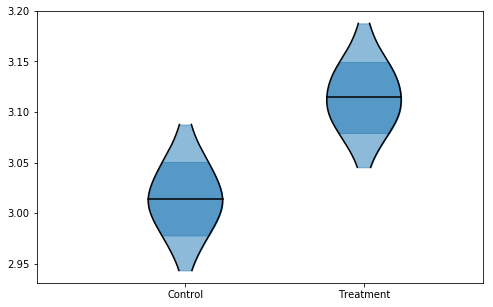

In [34]:
data = stats.gamma(2, 2, 0.5).rvs(400)
show_bars = False
plt.figure(figsize=(8, 5))
plot_catseye(0, data, show_bars=show_bars, scale=0.5)
plot_catseye(1.2, data + 0.1, show_bars=show_bars, scale=0.5)#, ax=ax)
plt.gca().set(xlim=(-1, 2), xticks=[0, 1.2], xticklabels=['Control', 'Treatment']);

## Conclusions (part 1 of 3)

  - The Standard Deviation represents 1 Measure of Error (MoE).
  - 1 MoE isn't Enough to Summarize a Distribution.  You need at least 2.
  - 95% IQI is a simple 2-MoE metric that works for all distributions.
  
**Never use errorbars to show your data's distribution! Use violins, boxplots, boxenplots, histograms, or cat's eyes!**
  

## Conclusions (part 2 of 3)

  - The Standard Error of the Mean (SEM) is a 1-MoE estimate of the Population's Mean.
  - It gets smaller, the more data you have.
  - 1 MoE isn't Enough to Summarize a Distribution.  You need at least 2.
  - 95% CI is a simple 2-MoE metric that works for all distributions and all estimators.
  
**If you need errorbars, use 95% CIs!  But consider Cat's Eyes, instead--they're more intuitive!**

## Conclusions (part 3 of 3)

  - The mean you measure isn't interesting. 
  - The world that generated your data has an interesting mean.
  - Resampling your data lets you find that interesting mean!
  
**Use your experiment to tell us about the world, not just your experiment!**

## Thank You for your Attention!
<img src="img/cumming.png" alt="Drawing" style="width: 200px;"/>

### Bayesian Statistics and the "Posterior Prediction" Error Bar

In [18]:
import pymc3 as pm
data = stats.norm(2, 3).rvs(400)

with pm.Model() as model:
    mean = pm.Uniform('mean', lower=-10, upper=10)
    std = pm.HalfNormal('std', sd=5)
    y_observed = pm.Normal('y_observed', mu=mean, sd=std, observed=data)

/home/nickdg/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [std, mean]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:04<00:00, 1616.34draws/s]


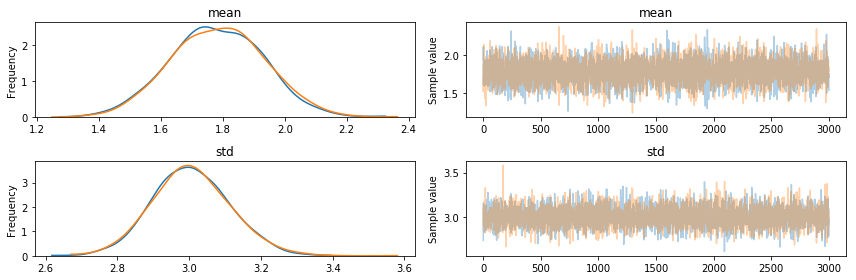

In [19]:
with model:
    trace = pm.sample(3000)

pm.traceplot(trace);

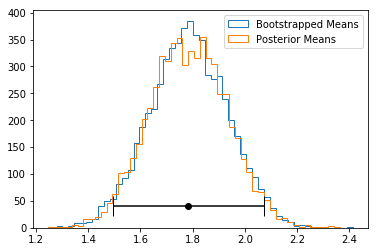

In [20]:
plt.hist(np.random.choice(data, size=(6000, len(data))).mean(axis=1), bins=50, histtype='step', label='Bootstrapped Means');
plt.hist(trace.mean, bins=50, histtype='step', label='Posterior Means')

mean = trace.mean.mean()
err1, err2 = np.percentile(trace.mean, [2.5, 97.5])
plt.errorbar(y=40, x=mean, xerr=[[mean - err1], [err2 - mean]], capsize=10, fmt='o', color='black')
plt.legend();